In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import beta distribution
from scipy.stats import beta
import pandas as pd
from tikzplotlib import save as tikz_save


# Noisy signals (objective) model

/var/folders/gw/vbypfgbn24950nt2n5dm0jg40000gr/T/ipykernel_96683/4219581312.py:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['30% GT pos', '70% GT neg'], fontsize=14,


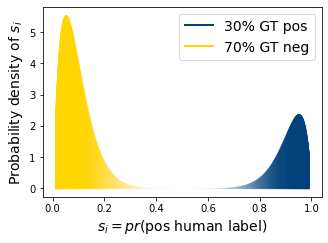

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from math import pow

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1)

# Define parameters for the beta distribution
alpha1, beta1 = 2, 20
alpha2, beta2 = 20, 2

# Generate a range of x values for the beta distribution
x = np.linspace(0.01, 0.99, 1000)

# Calculate the pdf of the beta distributions
y1 = beta.pdf(x, alpha1, beta1)
y2 = beta.pdf(x, alpha2, beta2)

# plot the beta distributions, superimposed.
# Calculate the mixture of two distributions, .7 of the first and .3 of the second
mixture = 0.7 * y1 + 0.3 * y2 

# Plot the joint distribution of the two beta distributions
# ax.plot(x, mixture, 'k-')
# fill the areas of the two components; there's a bug in fill that doesn't take an array for alpha, so manually doing it.
# Loop over the x-axis values
for i in range(len(x)-1):
    if x[i]>0.5:
        ax.fill_between(x[i:i+2], y1[i:i+2]*.7, mixture[i:i+2], color='#00417C', alpha=pow(x[i], 8))
    else:
        ax.fill_between(x[i:i+2], 0, y1[i:i+2]*.7, color='#FFD600', alpha=pow(1-x[i], 8))


# Add x and y axis label with subscripted "i"
ax.set_xlabel('$s_{i} = pr(\mathrm{pos\ human\ label})$', fontsize=14)
ax.set_ylabel('Probability density of $s_{i}$', fontsize=14)

# Add legend elements
ax.legend(['30% GT pos', '70% GT neg'], fontsize=14, 
          labels=['30% GT pos', '70% GT neg'], 
          handles=[plt.Line2D([0], [0], color='#00417C', lw=2),
                   plt.Line2D([0], [0], color='#FFD600', lw=2)])

# ax.legend(fontsize=14)

fig.set_size_inches(5, 3.5, forward=True)

# Save the figure as SVG
fig.savefig('objectiveJD.svg', format='svg')

# Show the plot
plt.show()





# Subjective judgments model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


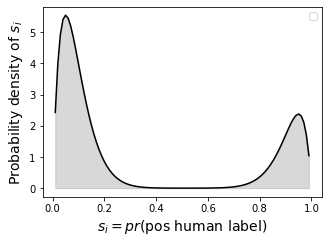

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1)

# Define parameters for the beta distribution
alpha1, beta1 = 2, 20
alpha2, beta2 = 20, 2

# Generate a range of x values for the beta distribution
x = np.linspace(0.01, 0.99, 100)

# Calculate the pdf of the beta distributions
y1 = beta.pdf(x, alpha1, beta1)
y2 = beta.pdf(x, alpha2, beta2)

# plot the beta distributions, superimposed.
# Calculate the mixture of two distributions, .7 of the first and .3 of the second
mixture = 0.7 * y1 + 0.3 * y2 

# Plot the joint distribution of the two beta distributions

ax.plot(x, mixture, 'k-')
# shade it gray
ax.fill_between(x, 0, mixture, color='gray', alpha=0.3)

# Add x and y axis label
ax.set_xlabel('$s_{i} = pr(\mathrm{pos\ human\ label})$', fontsize=14)
ax.set_ylabel('Probability density of $s_{i}$', fontsize=14)


ax.legend()

fig.set_size_inches(5, 3.5, forward=True)

# Save the figure as SVG
fig.savefig('subjectiveJD.svg', format='svg')


# Show the plot
plt.show()


